# Creazione screener evoluto su singolo asset

Architettura di un Hammer e di una Shooting Star con conferma.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ffn
import datetime

ticker = "JNJ"
startdate = "2007-01-01"
enddate = "2020-11-10"

In [45]:
input_string = ticker + ":Open," + ticker + ":High," + \
               ticker + ":Low," + ticker + ":Close," + ticker + ":Volume"
input_string

'JNJ:Open,JNJ:High,JNJ:Low,JNJ:Close,JNJ:Volume'

In [46]:
dataset =  ffn.get(input_string, start = startdate, end = enddate).apply(lambda x: round(x,2))
dataset.head(10)

,jnjopen,jnjhigh,jnjlow,jnjclose,jnjvolume
Date,,,,,
2007-01-03,66.13,67.10,66.11,66.40,12845300.0
2007-01-04,65.90,67.62,65.90,67.23,11262000.0
2007-01-05,66.80,67.25,66.50,66.62,8141100.0
2007-01-08,66.51,66.75,66.05,66.51,6180400.0
2007-01-09,66.60,66.85,66.13,66.26,7147100.0
2007-01-10,66.56,66.56,66.07,66.15,6528700.0
2007-01-11,66.40,66.84,66.28,66.73,6371500.0
2007-01-12,66.45,66.80,66.30,66.64,6189400.0
2007-01-16,66.65,66.75,66.30,66.54,7963700.0


In [47]:
dataset.columns = ["open","high","low","close","volume"]
dataset.tail(10)

,open,high,low,close,volume
Date,,,,,
2020-10-28,141.43,141.98,138.18,138.36,8426100.0
2020-10-29,138.00,138.70,136.05,137.19,7205400.0
2020-10-30,136.68,137.54,133.65,137.11,7364100.0
2020-11-02,138.98,139.01,137.49,138.69,7088000.0
2020-11-03,140.02,140.96,137.78,138.50,6363000.0
2020-11-04,139.49,142.54,138.70,139.40,10263500.0
2020-11-05,140.55,141.83,139.26,139.76,8016200.0
2020-11-06,140.40,143.19,139.65,142.25,5942500.0
2020-11-09,148.43,148.99,144.92,146.08,12351600.0


In [48]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
#%matplotlib inline

graph_title = ticker + " from " + str(dataset.index[0]) + " to " \
                                + str(dataset.index[-1]) + " - Powered by Gandalf Project R&D"
dataset.tail(100).iplot(kind = 'candle', theme = 'white',
                        up_color = 'green', down_color = 'red',
                        title = graph_title, xTitle = "Time", yTitle = "Prices")

In [49]:
dataset["range_perc"] = (dataset.high - dataset.low) / dataset.low * 100
dataset["open_pos"] = (dataset.open - dataset.low) / (dataset.high - dataset.low) * 100
dataset["close_pos"] = (dataset.close - dataset.low) / (dataset.high - dataset.low) * 100
dataset["SMA20"] = dataset.close.rolling(20).mean()
dataset["STD20"] = dataset.close.rolling(20).std()
dataset["BBU"] = dataset.SMA20 + 2 * dataset.STD20
dataset["BBL"] = dataset.SMA20 - 2 * dataset.STD20
dataset.dropna(inplace = True)
dataset.head(10)

,open,high,low,close,volume,range_perc,open_pos,close_pos,SMA20,STD20,BBU,BBL
Date,,,,,,,,,,,,
2007-01-31,66.39,67.02,66.15,66.80,8171600.0,1.315193,27.586207,74.712644,66.7100,0.474763,67.659526,65.760474
2007-02-01,66.80,67.07,66.50,67.01,9232500.0,0.857143,52.631579,89.473684,66.7405,0.473392,67.687283,65.793717
2007-02-02,67.00,67.15,66.49,66.58,11317500.0,0.992630,77.272727,13.636364,66.7080,0.460144,67.628288,65.787712
2007-02-05,66.38,66.60,66.10,66.30,7526200.0,0.756430,56.000000,40.000000,66.6920,0.468846,67.629693,65.754307
2007-02-06,66.39,66.43,65.79,66.00,8180100.0,0.972792,93.750000,32.812500,66.6665,0.492537,67.651573,65.681427
2007-02-07,66.00,66.10,65.65,65.80,7795300.0,0.685453,77.777778,33.333333,66.6435,0.522356,67.688211,65.598789
2007-02-08,65.76,65.97,65.60,65.76,7340100.0,0.564024,43.243243,43.243243,66.6240,0.548379,67.720759,65.527241
2007-02-09,65.86,66.10,65.53,65.60,7107600.0,0.869831,57.894737,12.280702,66.5675,0.593259,67.754019,65.380981
2007-02-12,65.72,65.87,65.36,65.46,6067300.0,0.780294,70.588235,19.607843,66.5085,0.642317,67.793134,65.223866


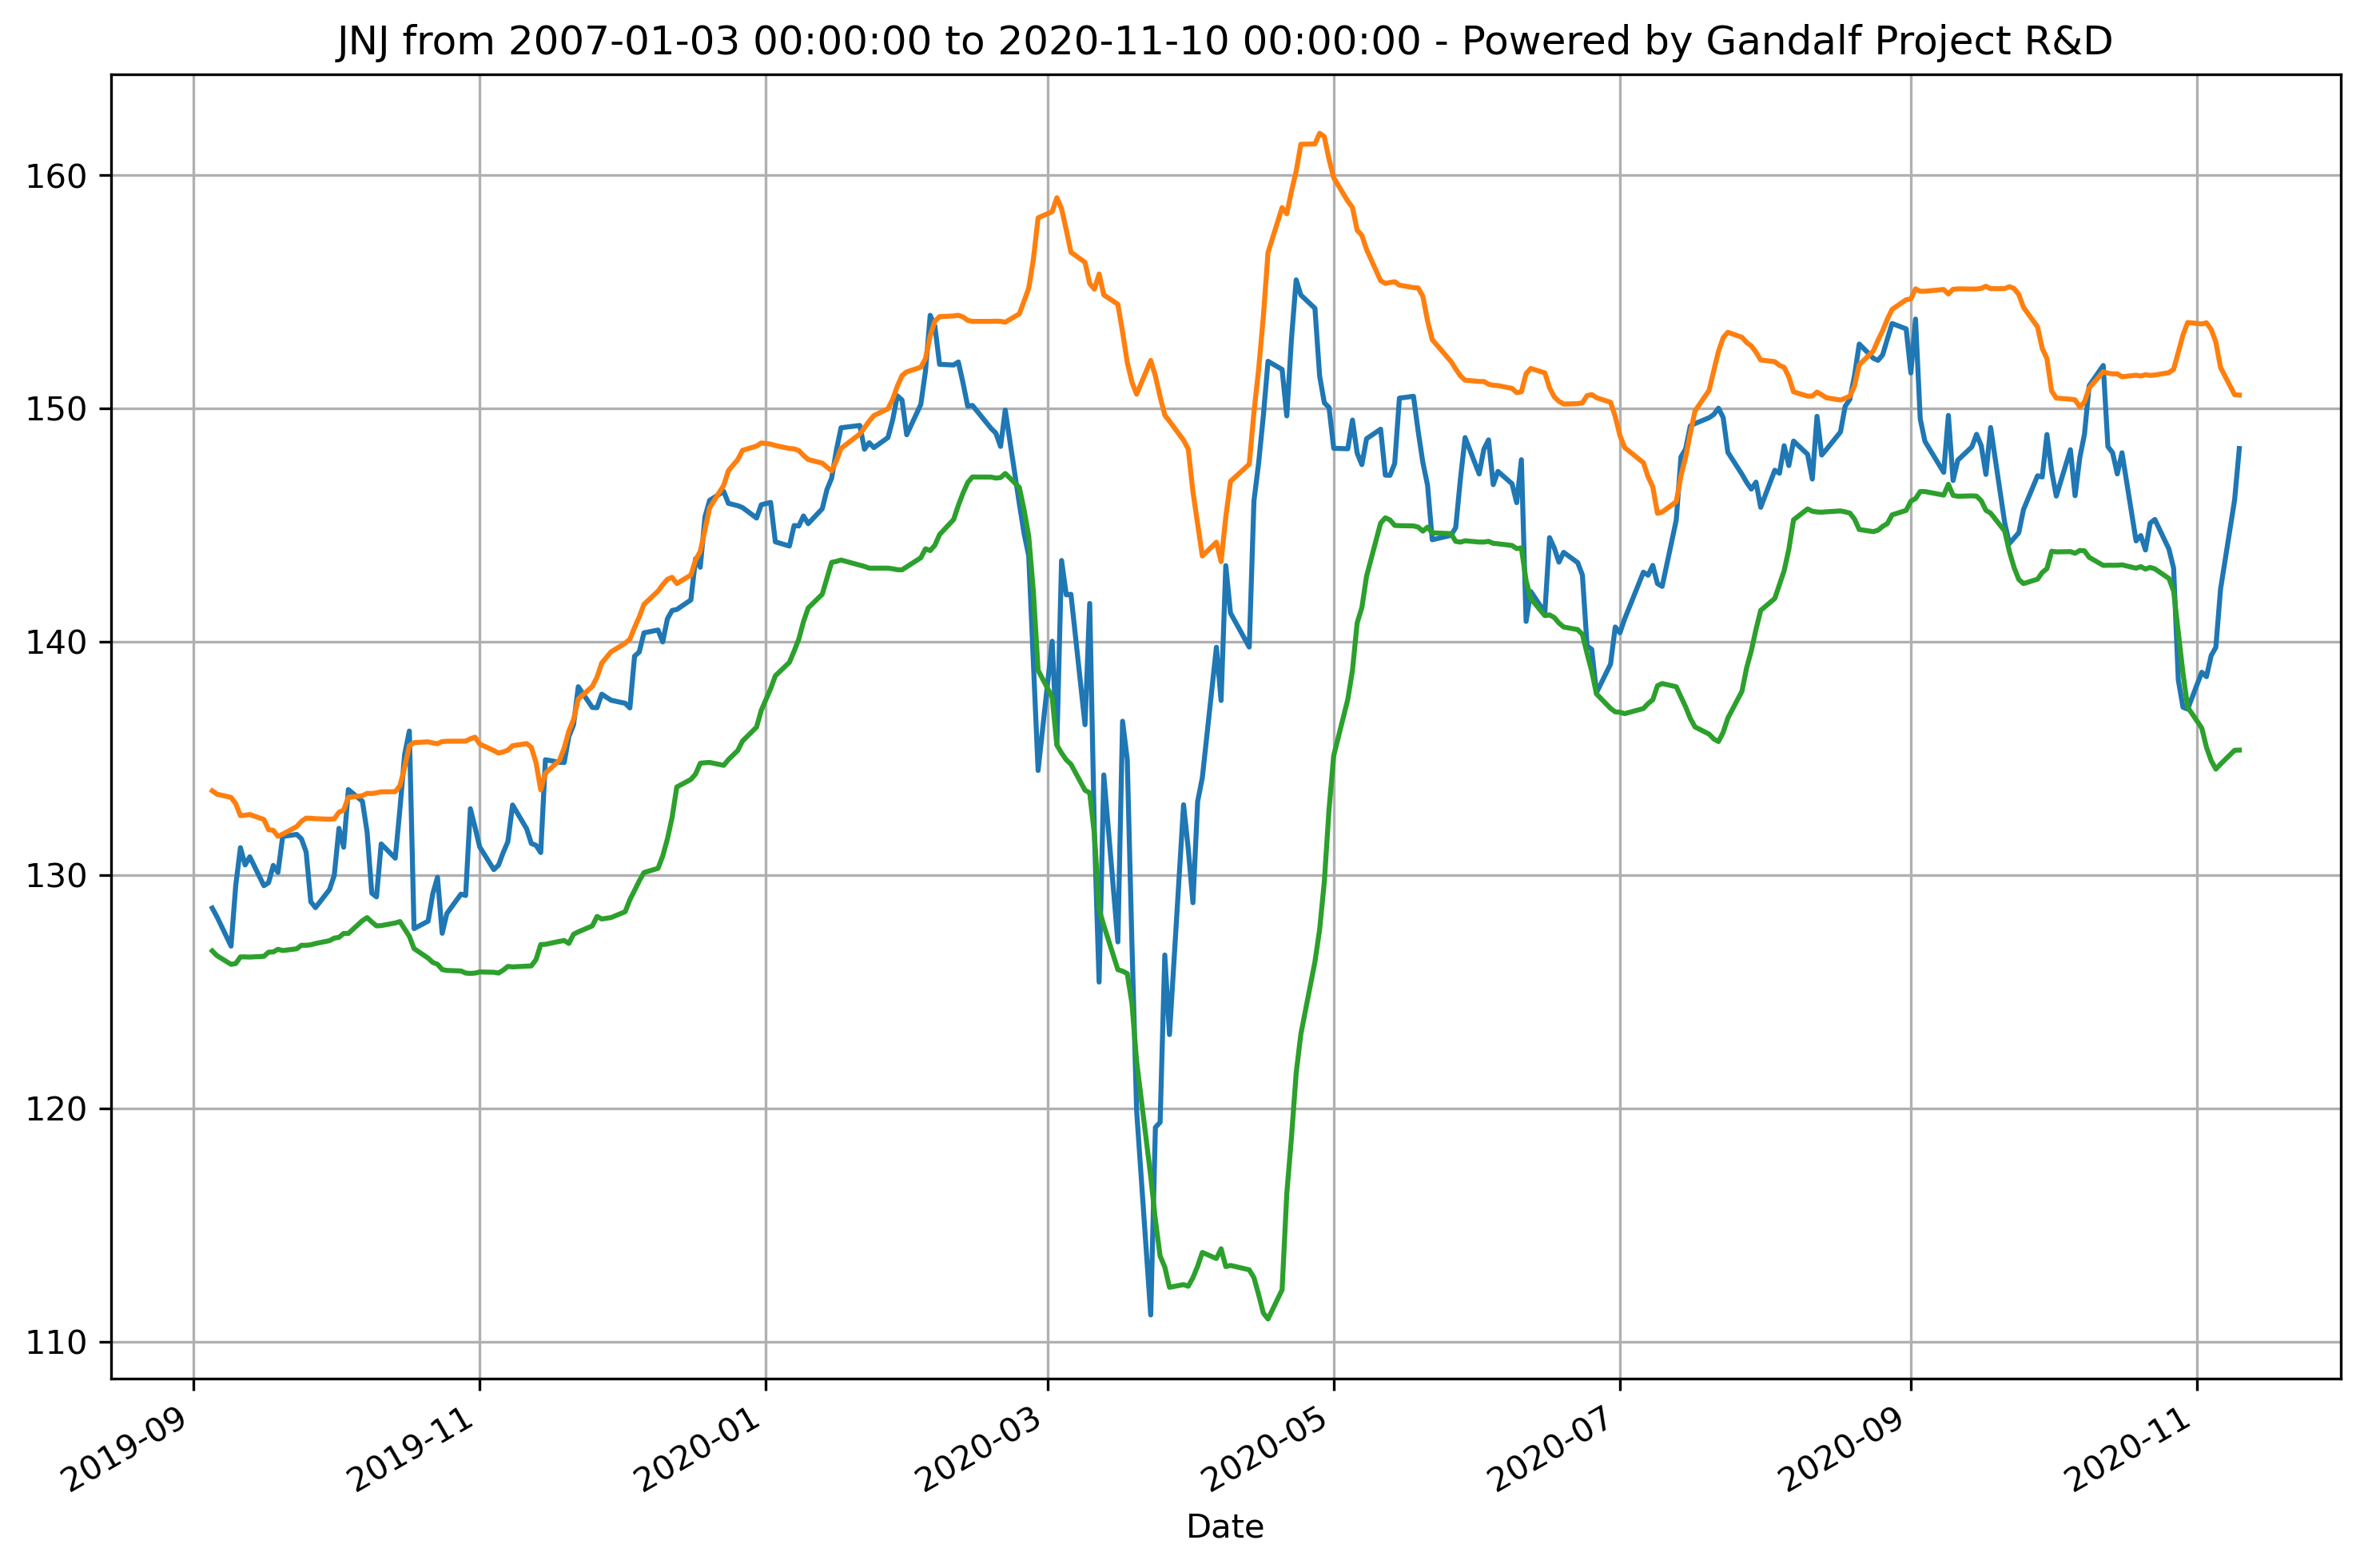

In [50]:
plt.figure(figsize = [12,8], dpi = 300)
plt.title(graph_title)
dataset.close[-300:].plot()
dataset.BBU[-300:].plot()
dataset.BBL[-300:].plot().grid()

# <span style="color:green">Esempio pattern "Hammer"</span>

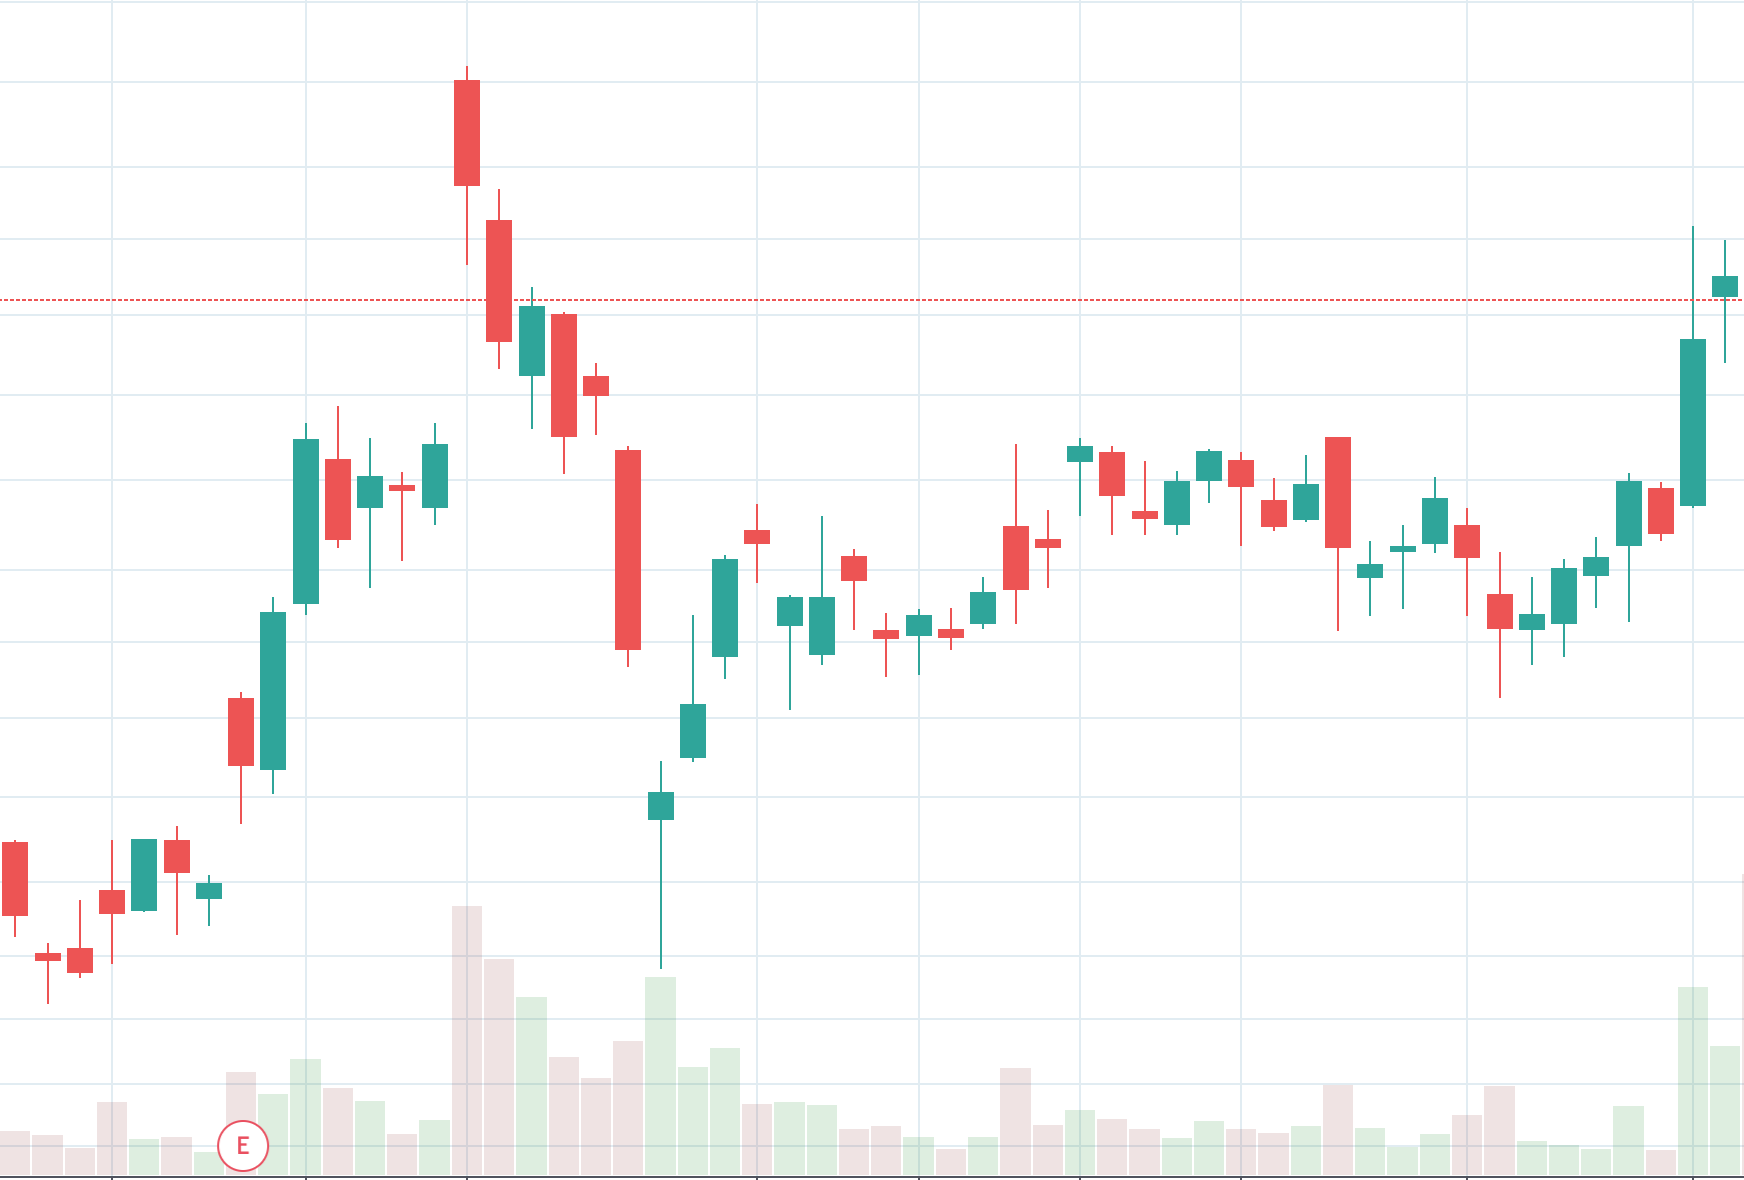

#### Old Pattern

In [61]:
#pattern = (dataset.low < dataset.BBL) & (dataset.close > dataset.BBL) & \
#          (dataset.close_pos > 70) & (dataset.open_pos > 70) & (dataset.range_perc > 1)

#### New Pattern

In [62]:
pattern = (dataset.low.shift(1) < dataset.BBL.shift(1)) & (dataset.close.shift(1) > dataset.BBL.shift(1)) & \
          (dataset.close_pos.shift(1) > 70) & (dataset.open_pos.shift(1) > 70) & \
          (dataset.range_perc.shift(1) > 1) & \
          (dataset.high > dataset.high.shift(1)) & (dataset.open <= dataset.high.shift(1))

Occurrences: 5 

DatetimeIndex(['2017-07-28', '2018-07-03', '2019-05-16', '2019-09-30',
               '2020-03-25'],
              dtype='datetime64[ns]', name='Date', freq=None) 

After: 1 days: 9.56 average of 1.91 with 4 winning trades and 1 loosing trades
After: 2 days: 8.51 average of 1.7 with 5 winning trades and 0 loosing trades
After: 3 days: 17.2 average of 3.44 with 5 winning trades and 0 loosing trades
After: 4 days: 20.95 average of 4.19 with 5 winning trades and 0 loosing trades
After: 5 days: 17.85 average of 3.57 with 5 winning trades and 0 loosing trades
After: 6 days: 21.13 average of 4.23 with 5 winning trades and 0 loosing trades
After: 7 days: 15.33 average of 3.07 with 4 winning trades and 1 loosing trades
After: 8 days: 14.74 average of 2.95 with 3 winning trades and 2 loosing trades
After: 9 days: 19.79 average of 3.96 with 4 winning trades and 1 loosing trades
After: 10 days: 22.7 average of 4.54 with 4 winning trades and 1 loosing trades


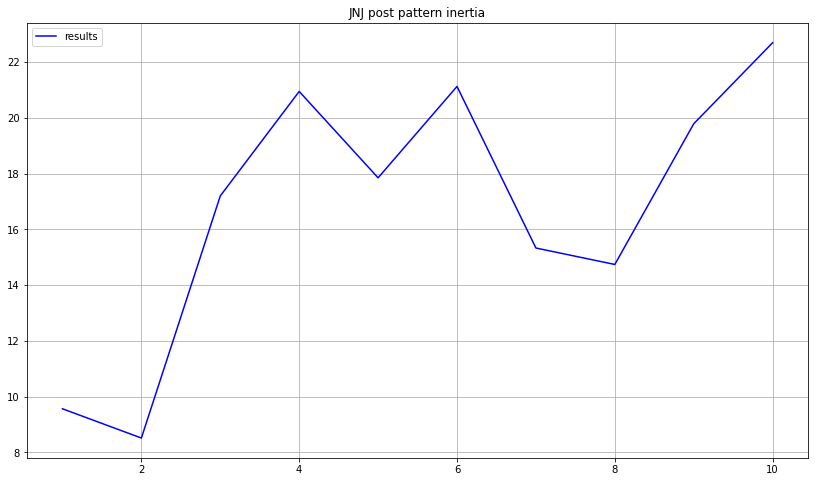

In [63]:
def pattern_stats(dataframe, pattern, direction, delay, ticker):
    """
    Function to calculate pattern stats
    """
    service = dataframe.copy()
    dates = service[pattern == True].index
    occurrences = service[pattern == True].count()[0]
    print("Occurrences:", occurrences, "\n")
    print(dates,"\n")
    results = []
    for i in range(0, delay):
        label = "st" + str(i)
        if direction == "long":
            service[label] = np.where(pattern.shift(1) == True, service.close.shift(-i) - service.open, np.nan)
        else:
            service[label] = np.where(pattern.shift(1) == True, -service.close.shift(-i) + service.open, np.nan)
        profit = round(service[label].sum(),2)
        avg_profit = round(profit / occurrences, 2)
        winning_trades = service[service[label] > 0].count()[0]
        loosing_trades = service[service[label] <= 0].count()[0]
        print("After:", i + 1,  "days:", profit, "average of", avg_profit, "with", winning_trades, "winning trades and", loosing_trades, "loosing trades")
        results.append(profit)
    plotting_results = pd.DataFrame(results, columns = ["results"], 
                                    index = range(1, delay + 1))
    plotting_results.plot(figsize = [14,8], color = "blue").grid()
    plt.title(ticker + " post pattern inertia")
    plt.show()
    return dates, plotting_results

results = pattern_stats(dataset, pattern, "long", 10, ticker)

In [64]:
def plot_patterns_confirmation(dataframe, results):
    """
    Function that plots every single pattern occurrence
    """
    for date in results:
        single_case = dataframe[(dataframe.index >= (date - pd.Timedelta(days = 3))) & \
                                (dataframe.index <= (date + pd.Timedelta(days = 20)))]    
        graph_title = ticker + " from " + str(single_case.index[0]) + " - Powered by Gandalf Project R&D"

        single_case.iplot(kind = 'candle', theme = 'white',
                          up_color = "green", down_color = "red",
                          title = graph_title, xTitle = "Time", yTitle = "Prices")
    return

plot_patterns_confirmation(dataset, results[0])

# <span style="color:red">Esempio "Shooting Star"</span>

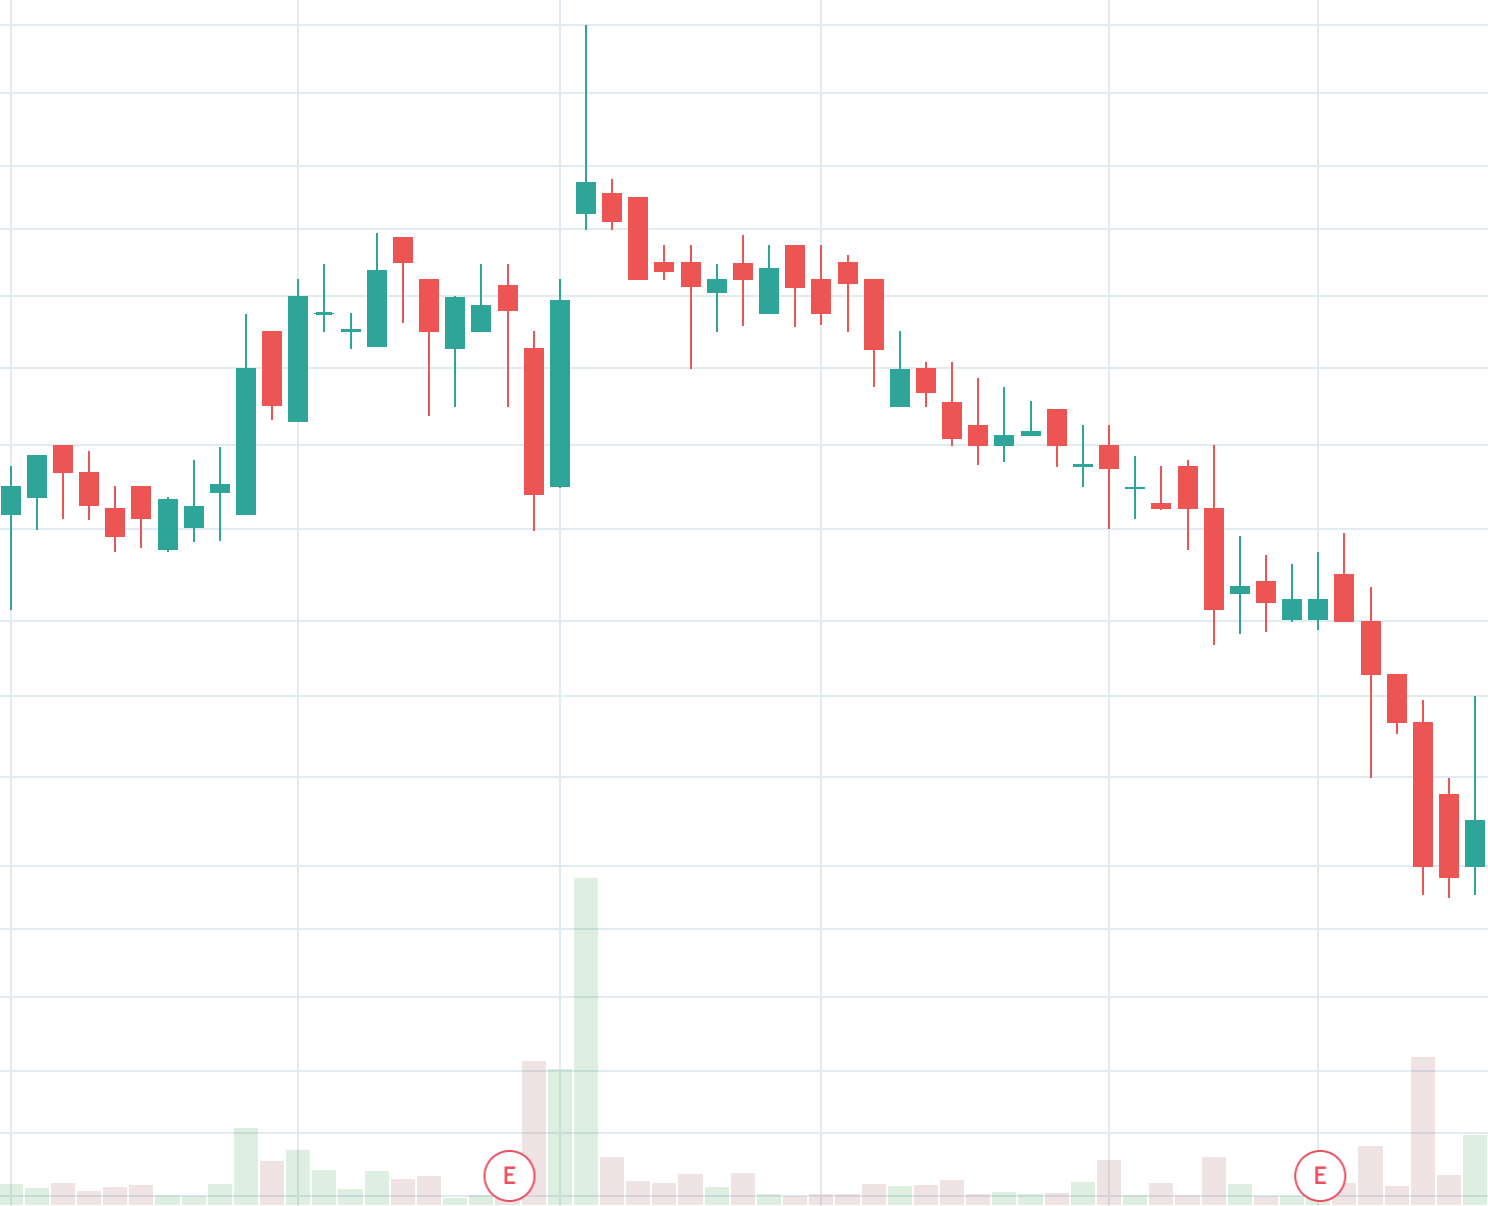

#### Old Pattern

In [28]:
#pattern = (dataset.high > dataset.BBU) & (dataset.close < dataset.BBU) & \
#          (dataset.close_pos < 30) & (dataset.open_pos < 30) & (dataset.range_perc > 1)

#### New Pattern

In [65]:
pattern = (dataset.high.shift(1) > dataset.BBU.shift(1)) & (dataset.close.shift(1) < dataset.BBU.shift(1)) & \
          (dataset.close_pos.shift(1) < 30) & (dataset.open_pos.shift(1) < 30) & \
          (dataset.range_perc.shift(1) > 1) & \
          (dataset.low < dataset.low.shift(1)) & (dataset.open >= dataset.low.shift(1))

Occurrences: 1 

DatetimeIndex(['2020-07-22'], dtype='datetime64[ns]', name='Date', freq=None) 

After: 1 days: 0.6 average of 0.6 with 1 winning trades and 0 loosing trades
After: 2 days: 2.09 average of 2.09 with 1 winning trades and 0 loosing trades
After: 3 days: 3.03 average of 3.03 with 1 winning trades and 0 loosing trades
After: 4 days: 3.38 average of 3.38 with 1 winning trades and 0 loosing trades
After: 5 days: 3.67 average of 3.67 with 1 winning trades and 0 loosing trades
After: 6 days: 3.37 average of 3.37 with 1 winning trades and 0 loosing trades
After: 7 days: 4.45 average of 4.45 with 1 winning trades and 0 loosing trades
After: 8 days: 2.86 average of 2.86 with 1 winning trades and 0 loosing trades
After: 9 days: 2.99 average of 2.99 with 1 winning trades and 0 loosing trades
After: 10 days: 1.81 average of 1.81 with 1 winning trades and 0 loosing trades


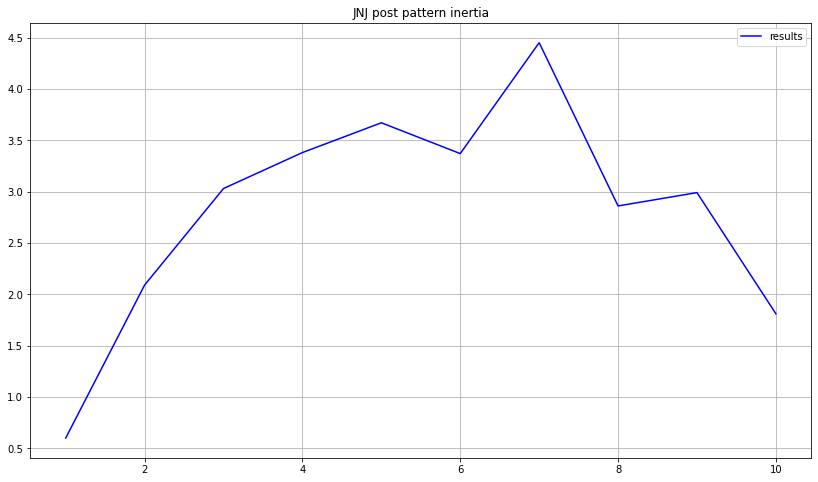

In [66]:
results = pattern_stats(dataset, pattern, "short", 10, ticker)

In [67]:
plot_patterns_confirmation(dataset, results[0])